In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cppimport

%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.2.4.dev6+g2171caa


In [3]:
cppimport.force_rebuild()
kepler_bench = cppimport.imp("kepler_bench")

In [4]:
evals = np.linspace(0.01, 0.99, 10)

times_rv = np.zeros_like(evals)
err_rv = np.zeros_like(evals)
max_rv = np.zeros_like(evals)

times_xo = np.zeros_like(evals)
err_xo = np.zeros_like(evals)
max_xo = np.zeros_like(evals)

times_bm = np.zeros_like(evals)
err_bm = np.zeros_like(evals)
max_bm = np.zeros_like(evals)

K = 5

for ie, e in enumerate(evals):
    print(e)

    for k in range(K):
        results = kepler_bench.exoplanet(e)
        times_xo[ie] += results[0] / K
        err_xo[ie] += results[3] / K
        max_xo[ie] += results[1] / K

    for k in range(K):
        results = kepler_bench.radvel(e)
        times_rv[ie] += results[0] / K
        err_rv[ie] += results[3] / K
        max_rv[ie] += results[1] / K

    for k in range(K):
        results = kepler_bench.batman(e)
        times_bm[ie] += results[0] / K
        err_bm[ie] += results[3] / K
        max_bm[ie] += results[1] / K

0.01


0.11888888888888888


0.22777777777777777


0.33666666666666667


0.44555555555555554


0.5544444444444444


0.6633333333333333


0.7722222222222221


0.8811111111111111


0.99


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


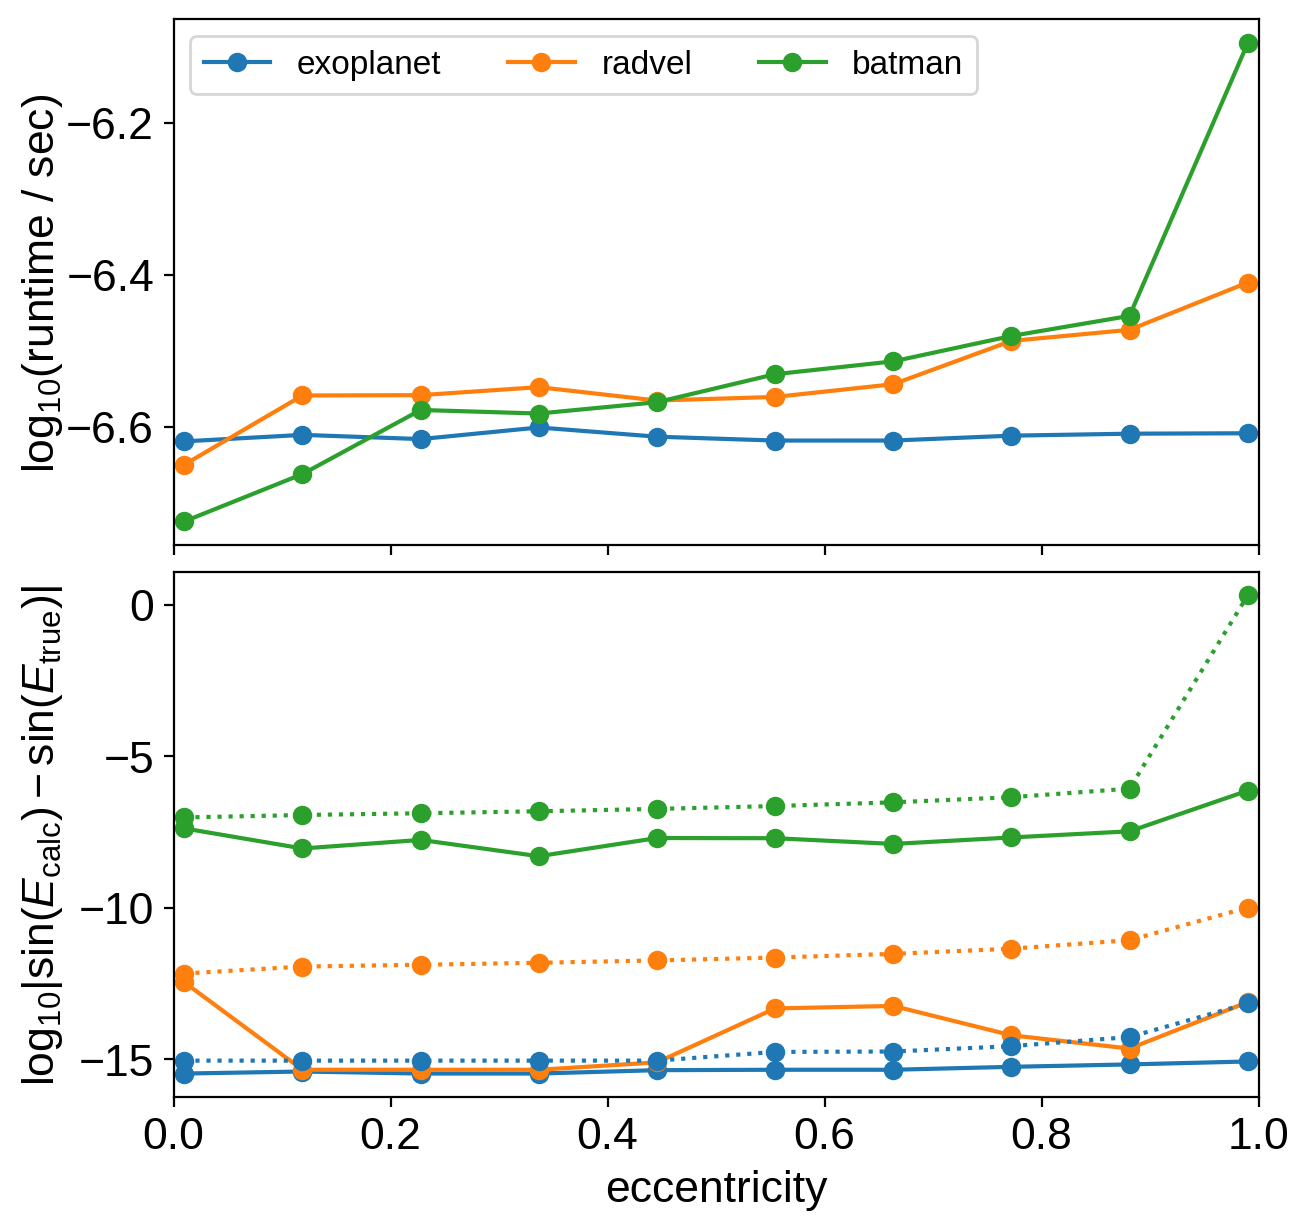

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

ax = axes[0]
ax.plot(evals, times_xo, "o-", label="exoplanet")
ax.plot(evals, times_rv, "o-", label="radvel")
ax.plot(evals, times_bm, "o-", label="batman")
ax.set_ylabel(r"$\log_{10}$(runtime / sec)")
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.legend(fontsize=12, ncol=3)

ax = axes[1]

plt.plot(evals, err_xo, "o-", label="exoplanet")
plt.plot(evals, err_rv, "o-", label="radvel")
plt.plot(evals, err_bm, "o-", label="batman")

plt.plot(evals, max_xo, "o:", color="C0", label="exoplanet")
plt.plot(evals, max_rv, "o:", color="C1", label="radvel")
plt.plot(evals, max_bm, "o:", color="C2", label="batman")

ax.set_xlim(0, 1)
ax.set_ylabel("$\log_{10}|\sin(E_\mathrm{calc}) - \sin(E_\mathrm{true})|$")
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlabel("eccentricity")

fig.subplots_adjust(hspace=0.05)
fig.savefig("kepler_solver.pdf", bbox_inches="tight");